In [39]:
def my_axis_options(ax):
    ax.loglog()
    ax.set_xlabel("Physical Error Rate × $10^3$ × Helios")
    ax.set_ylabel("Logical Error Rate per round")
    ax.legend()
    ax.grid()
    ax.grid(True, which = 'minor')
    # fig.set_dpi(120)  # Show it bigger
    # ax.set_ylim(1.8e-8, 3.5e-1) # the tham modules paper y lims
    ax.set_ylim(1.3992277047193278e-13, 3.9115107136890295)
    ax.set_xlim(5e-4, 1e-2)
    ax.legend(*zip(*sorted(zip(*ax.get_legend_handles_labels()), key=lambda x: tuple(map(int, re.findall(r'\d+', x[1]))))))  # sort legend labels by number of qubits
    # ax.figure.savefig(f"../plots/tham_modules_noise.png", dpi = 300, bbox_inches = "tight")
    ax.figure.savefig(f"../plots/scrap.pdf", dpi = 300, bbox_inches = "tight")

In [44]:
oneohsix = sinter.stats_from_csv_files('../collected_stats/helios_noise/helios_stats_1388106_copie.csv')

In [45]:
for stat in oneohsix:
    print(stat)

 268269353,         8,         0,101041397.0,bposd,653d03f1527d09c5c3e5238310eb86cc81f276817237b4c19febc6df308d3860,"{""A"":""'900102'"",""B"":""'03250260'"",""b"":""X"",""excl_opp_b_detectors"":""True"",""l"":30,""m"":6,""nkd"":""[[360_12_24]]"",""noise"":""helios"",""p"":0.002,""r"":24,""seq_gates"":""True""}",
1000000000,         0,         0,29849720.6,bposd,124036205e44b9048b9e29b254c372f94a30137390fb412b270e1ea3dd6295d1,"{""A"":""'900102'"",""B"":""'03250260'"",""b"":""X"",""excl_opp_b_detectors"":""True"",""l"":30,""m"":6,""nkd"":""[[360_12_24]]"",""noise"":""helios"",""p"":0.001,""r"":24,""seq_gates"":""True""}",
  11275645,        10,         0,17471930.1,bposd,cac96d6811c1ccc18788ba822712bd53d8a0b18918fe8e295913f698b1e0a125,"{""A"":""'900102'"",""B"":""'03250260'"",""b"":""X"",""excl_opp_b_detectors"":""True"",""l"":30,""m"":6,""nkd"":""[[360_12_24]]"",""noise"":""helios"",""p"":0.003,""r"":24,""seq_gates"":""True""}",
    100000,        65,         0,1040073.3,bposd,64ea326b

In [14]:
from glob import glob
import matplotlib.pyplot as plt
import sinter 
import re


# HELIOS:
files = glob('../collected_stats/helios_noise/*.csv')
collected_stats = sinter.stats_from_csv_files(*files)


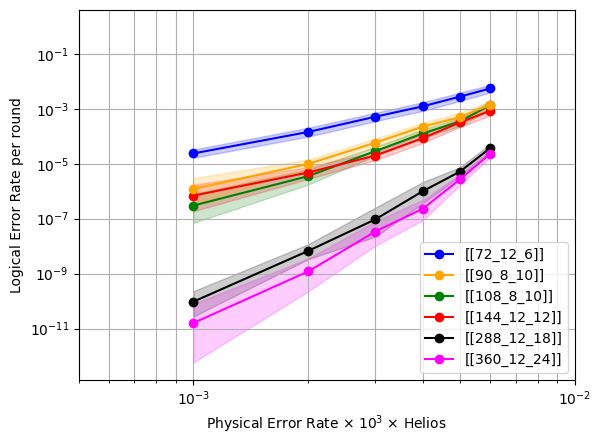

In [42]:
fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=collected_stats,
    x_func=lambda stats: stats.json_metadata['p'],
    
    group_func=lambda stats: stats.json_metadata['nkd'],
    failure_units_per_shot_func = lambda stats: stats.json_metadata['r'], # set as num_rounds ('r') failure units to find pL per round
    filter_func=lambda s: 
        s.json_metadata['p'] >0,
        #and s.json_metadata['b'] == 'Z' ,
        # and '288' not in s.json_metadata['nkd'],
    plot_args_func = lambda index, curve_id: {
        'color': 'green' if '108' in curve_id else 'red' if '144' in curve_id else 'orange' if '90' in curve_id else 'blue' if '72' in curve_id else 'black' if '288' in curve_id else 'magenta',
        'marker': 'o'
}

)

my_axis_options(ax)



In [36]:
# Memory times:
import numpy as np

def RMSE_MLE(n, k): # using the analytical solution for RMSE(p_MLE) for X~Bin(n,p) with n samples k hits
    MSE = (6*k**2 - n * k * (k + 6) + n**2 * (k + 2)) / (n**2 * (n + 2) * (n + 3))
    RMSE = np.sqrt(MSE)    
    return RMSE


p = 1e-3 

for stat in collected_stats:

    nkd = stat.json_metadata['nkd']

    if stat.json_metadata['p'] != 0.001:
        continue

    if nkd == '[[360_12_24]]':
        time_per_round = 0.592
    elif nkd == '[[288_12_18]]':
        time_per_round = 0.452
    else:
        continue

    num_rounds_as_number = stat.json_metadata['r']
    
    n = stat.shots
    k = stat.errors
    per_shot = k / n
    RMSE = RMSE_MLE(n, k)

    n = num_rounds_as_number
    pL_per_round = sinter.shot_error_rate_to_piece_error_rate(per_shot, pieces = n)
    RMSE = (RMSE / n) * (1 - 2 * pL_per_round)**((1 / n) - 1) # propagating error (derivation in OneNote)
    
    nr = p / pL_per_round
    nr_uncertainty = nr * (RMSE / pL_per_round)

    
    memorytime = time_per_round * nr
    memorytime_uncertainty = memorytime * (nr_uncertainty / nr)

    print(f'{nkd}: {round(memorytime/60/60/24)} days')

[[288_12_18]]: 55 days
[[360_12_24]]: 428 days


In [16]:
for stat in collected_stats:
    if stat.json_metadata['nkd'] == '[[360_12_24]]':
        print(stat)

7814504186,         3,         0,240429642.7,bposd,124036205e44b9048b9e29b254c372f94a30137390fb412b270e1ea3dd6295d1,"{""A"":""'900102'"",""B"":""'03250260'"",""b"":""X"",""excl_opp_b_detectors"":""True"",""l"":30,""m"":6,""nkd"":""[[360_12_24]]"",""noise"":""helios"",""p"":0.001,""r"":24,""seq_gates"":""True""}",
 278269353,         8,         0,105604617.6,bposd,653d03f1527d09c5c3e5238310eb86cc81f276817237b4c19febc6df308d3860,"{""A"":""'900102'"",""B"":""'03250260'"",""b"":""X"",""excl_opp_b_detectors"":""True"",""l"":30,""m"":6,""nkd"":""[[360_12_24]]"",""noise"":""helios"",""p"":0.002,""r"":24,""seq_gates"":""True""}",
  17197859,        14,         0,28668390.9,bposd,cac96d6811c1ccc18788ba822712bd53d8a0b18918fe8e295913f698b1e0a125,"{""A"":""'900102'"",""B"":""'03250260'"",""b"":""X"",""excl_opp_b_detectors"":""True"",""l"":30,""m"":6,""nkd"":""[[360_12_24]]"",""noise"":""helios"",""p"":0.003,""r"":24,""seq_gates"":""True""}",
    303102,       165,         0,3469722.3,bposd,64ea326